# Zomato costing prediction 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Zomato.csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Basic Checks 

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.tail

<bound method NDFrame.tail of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.shape

(148, 7)

In [7]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [8]:
df = df.rename(columns={'approx_cost(for two people)': 'cost'})
df = df.rename(columns={'listed_in(type)': 'list'})

In [9]:
# numerical columns
num_data = df.select_dtypes(include=["float64","int64"])
print("numerical columns",num_data.columns)

numerical columns Index(['votes', 'cost'], dtype='object')


In [10]:
# categorical columns
cat_data=df.select_dtypes(include=["O"])
print("categorical columns",cat_data.columns)

categorical columns Index(['name', 'online_order', 'book_table', 'rate', 'list'], dtype='object')


In [11]:
for i in cat_data:
  print(i,df[i].unique())
  print(df[i].value_counts())
  print("**********************")

name ['Jalsa' 'Spice Elephant' 'San Churro Cafe' 'Addhuri Udupi Bhojana'
 'Grand Village' 'Timepass Dinner'
 'Rosewood International Hotel - Bar & Restaurant' 'Onesta'
 'Penthouse Cafe' 'Smacznego' 'Village Café' 'Cafe Shuffle'
 'The Coffee Shack' 'Caf-Eleven' 'Cafe Vivacity' 'Catch-up-ino'
 "Kirthi's Biryani" 'T3H Cafe' '360 Atoms Restaurant And Cafe'
 'The Vintage Cafe' 'Woodee Pizza' 'Cafe Coffee Day' 'My Tea House'
 'Hide Out Cafe' 'CAFE NOVA' 'Coffee Tindi' 'Sea Green Cafe' 'Cuppa'
 "Srinathji's Cafe" 'Redberrys' 'Foodiction' 'Sweet Truth'
 'Ovenstory Pizza' 'Faasos' 'Behrouz Biryani' 'Fast And Fresh'
 'Szechuan Dragon' 'Empire Restaurant' 'Maruthi Davangere Benne Dosa'
 'Chaatimes' 'Havyaka Mess' "McDonald's" "Domino's Pizza" 'Hotboxit'
 'Kitchen Garden' 'Recipe' 'Beijing Bites' 'Tasty Bytes' 'Petoo'
 'Shree Cool Point' 'Corner House Ice Cream' 'Biryanis And More'
 'Roving Feast' 'FreshMenu' 'Banashankari Donne Biriyani' 'Wamama'
 'Five Star Chicken' 'XO Belgian Waffle' 'Peppy Pe

In [12]:
df.duplicated().sum()

0

# EDA 

In [13]:
import ydata_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

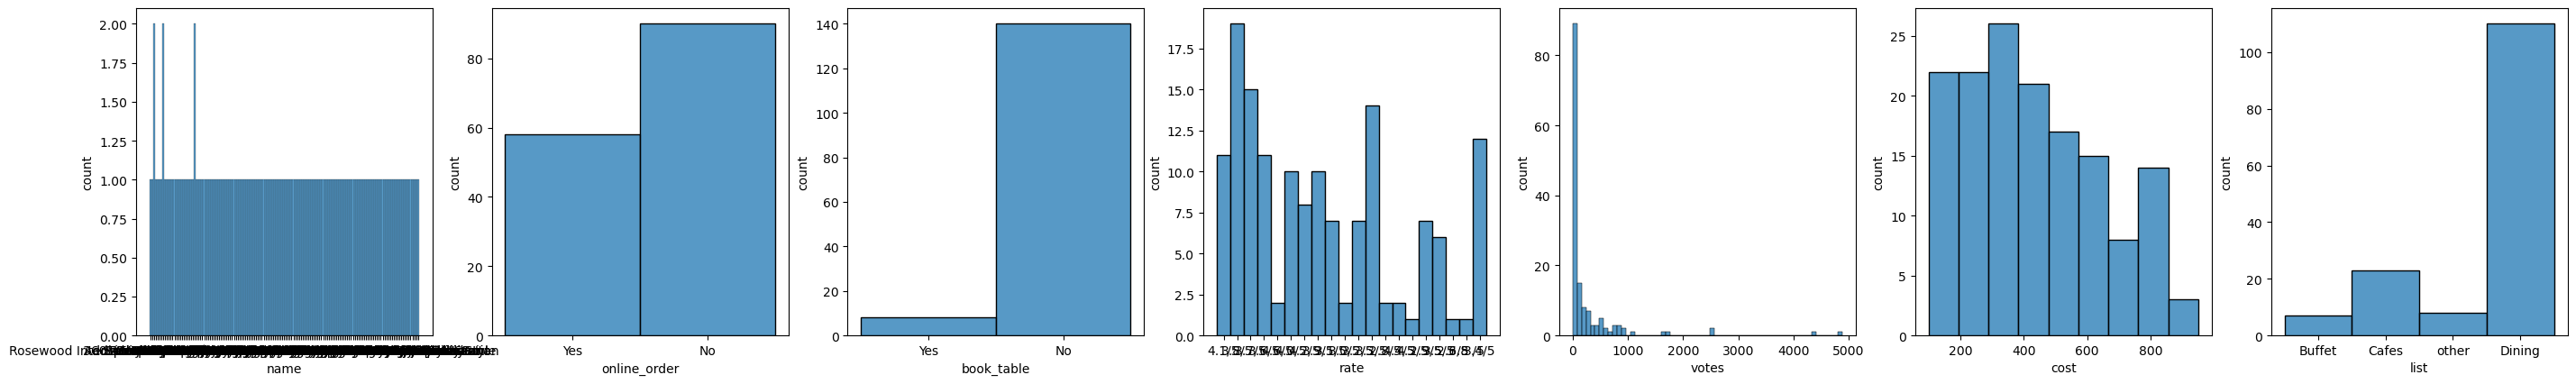

In [14]:
plt.figure(figsize=(45,50),facecolor='white')
plotnumber=1

for column in df:
  if plotnumber<=81:
    ax=plt.subplot(9,9,plotnumber)
    sns.histplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("count",fontsize=10)
  plotnumber+=1
plt.show()

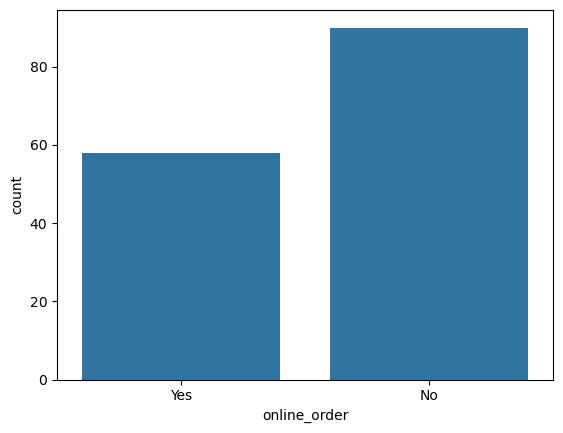

In [15]:
sns.countplot(x=df['online_order'])
plt.show()

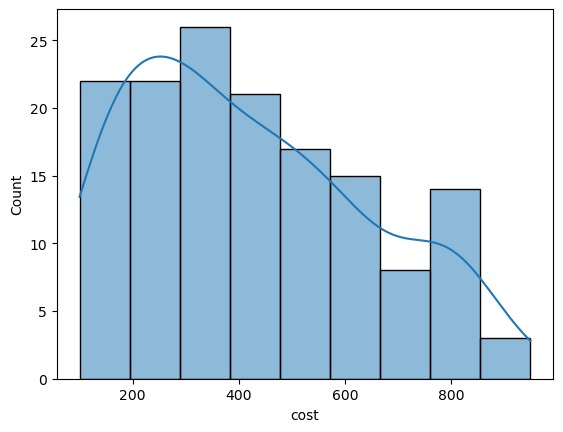

In [16]:
sns.histplot(x=df['cost'],kde=True)
plt.show()

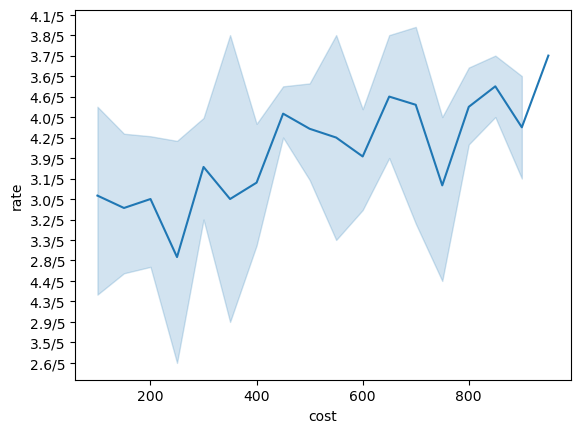

In [17]:
sns.lineplot(x=df['cost'],y=df['rate'])
plt.show()

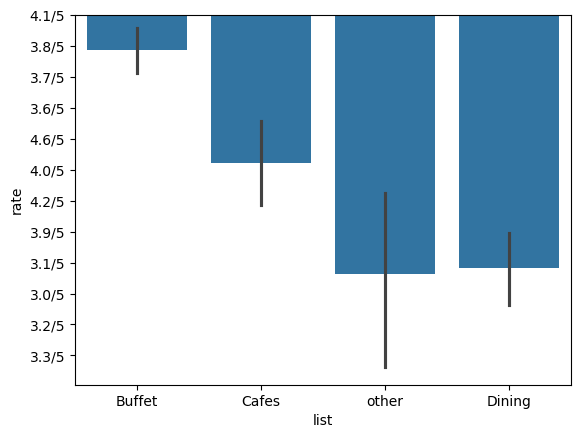

In [18]:
sns.barplot(x=df['list'],y=df['rate'])

plt.show()

## Bivariate Analysis 

In [19]:
cat_data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'list'], dtype='object')

In [20]:
d1=df[['online_order', 'book_table', 'rate', 'list']]

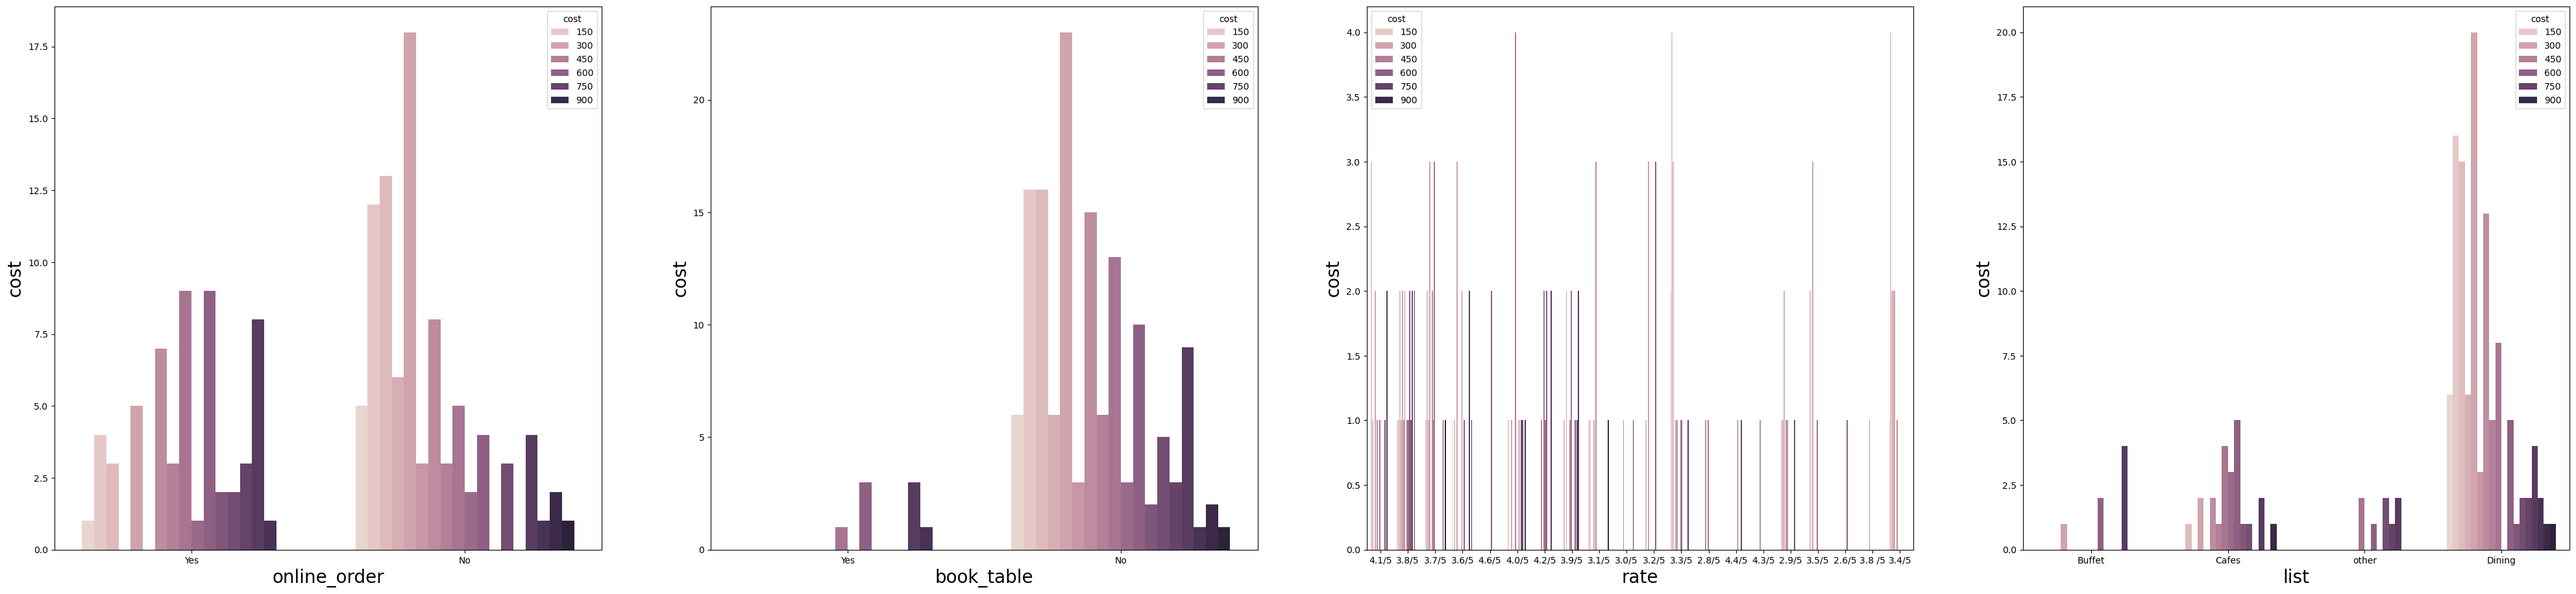

In [21]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50,50), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=d1[column]           
                        ,hue=df.cost)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('cost',fontsize=20) 
    plotnumber+=1
plt.show()

# Data Preprocessing 

In [22]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
cost            0
list            0
dtype: int64

# Converting categorical columns to numerical columns 

In [23]:
cat_data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'list'], dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.online_order=lc.fit_transform(df.online_order)
df.book_table=lc.fit_transform(df.book_table)
df.rate=lc.fit_transform(df.rate)
df.list=lc.fit_transform(df.list)


In [25]:
df

,name,online_order,book_table,rate,votes,cost,list
0,Jalsa,1,1,15,775,800,0
1,Spice Elephant,1,0,15,787,800,0
2,San Churro Cafe,1,0,12,918,800,0
3,Addhuri Udupi Bhojana,0,0,10,88,300,0
4,Grand Village,0,0,12,166,600,0
...,...,...,...,...,...,...,...
143,Melting Melodies,0,0,6,0,100,2
144,New Indraprasta,0,0,6,0,150,2
145,Anna Kuteera,1,0,14,771,450,2
146,Darbar,0,0,3,98,800,2


In [26]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'cost', 'list'], dtype='object')

In [27]:
num_data1=df[['online_order', 'book_table', 'rate', 'votes', 'cost', 'list']]

In [28]:
num_data1

,online_order,book_table,rate,votes,cost,list
0,1,1,15,775,800,0
1,1,0,15,787,800,0
2,1,0,12,918,800,0
3,0,0,10,88,300,0
4,0,0,12,166,600,0
...,...,...,...,...,...,...
143,0,0,6,0,100,2
144,0,0,6,0,150,2
145,1,0,14,771,450,2
146,0,0,3,98,800,2


# Feature Engineering 

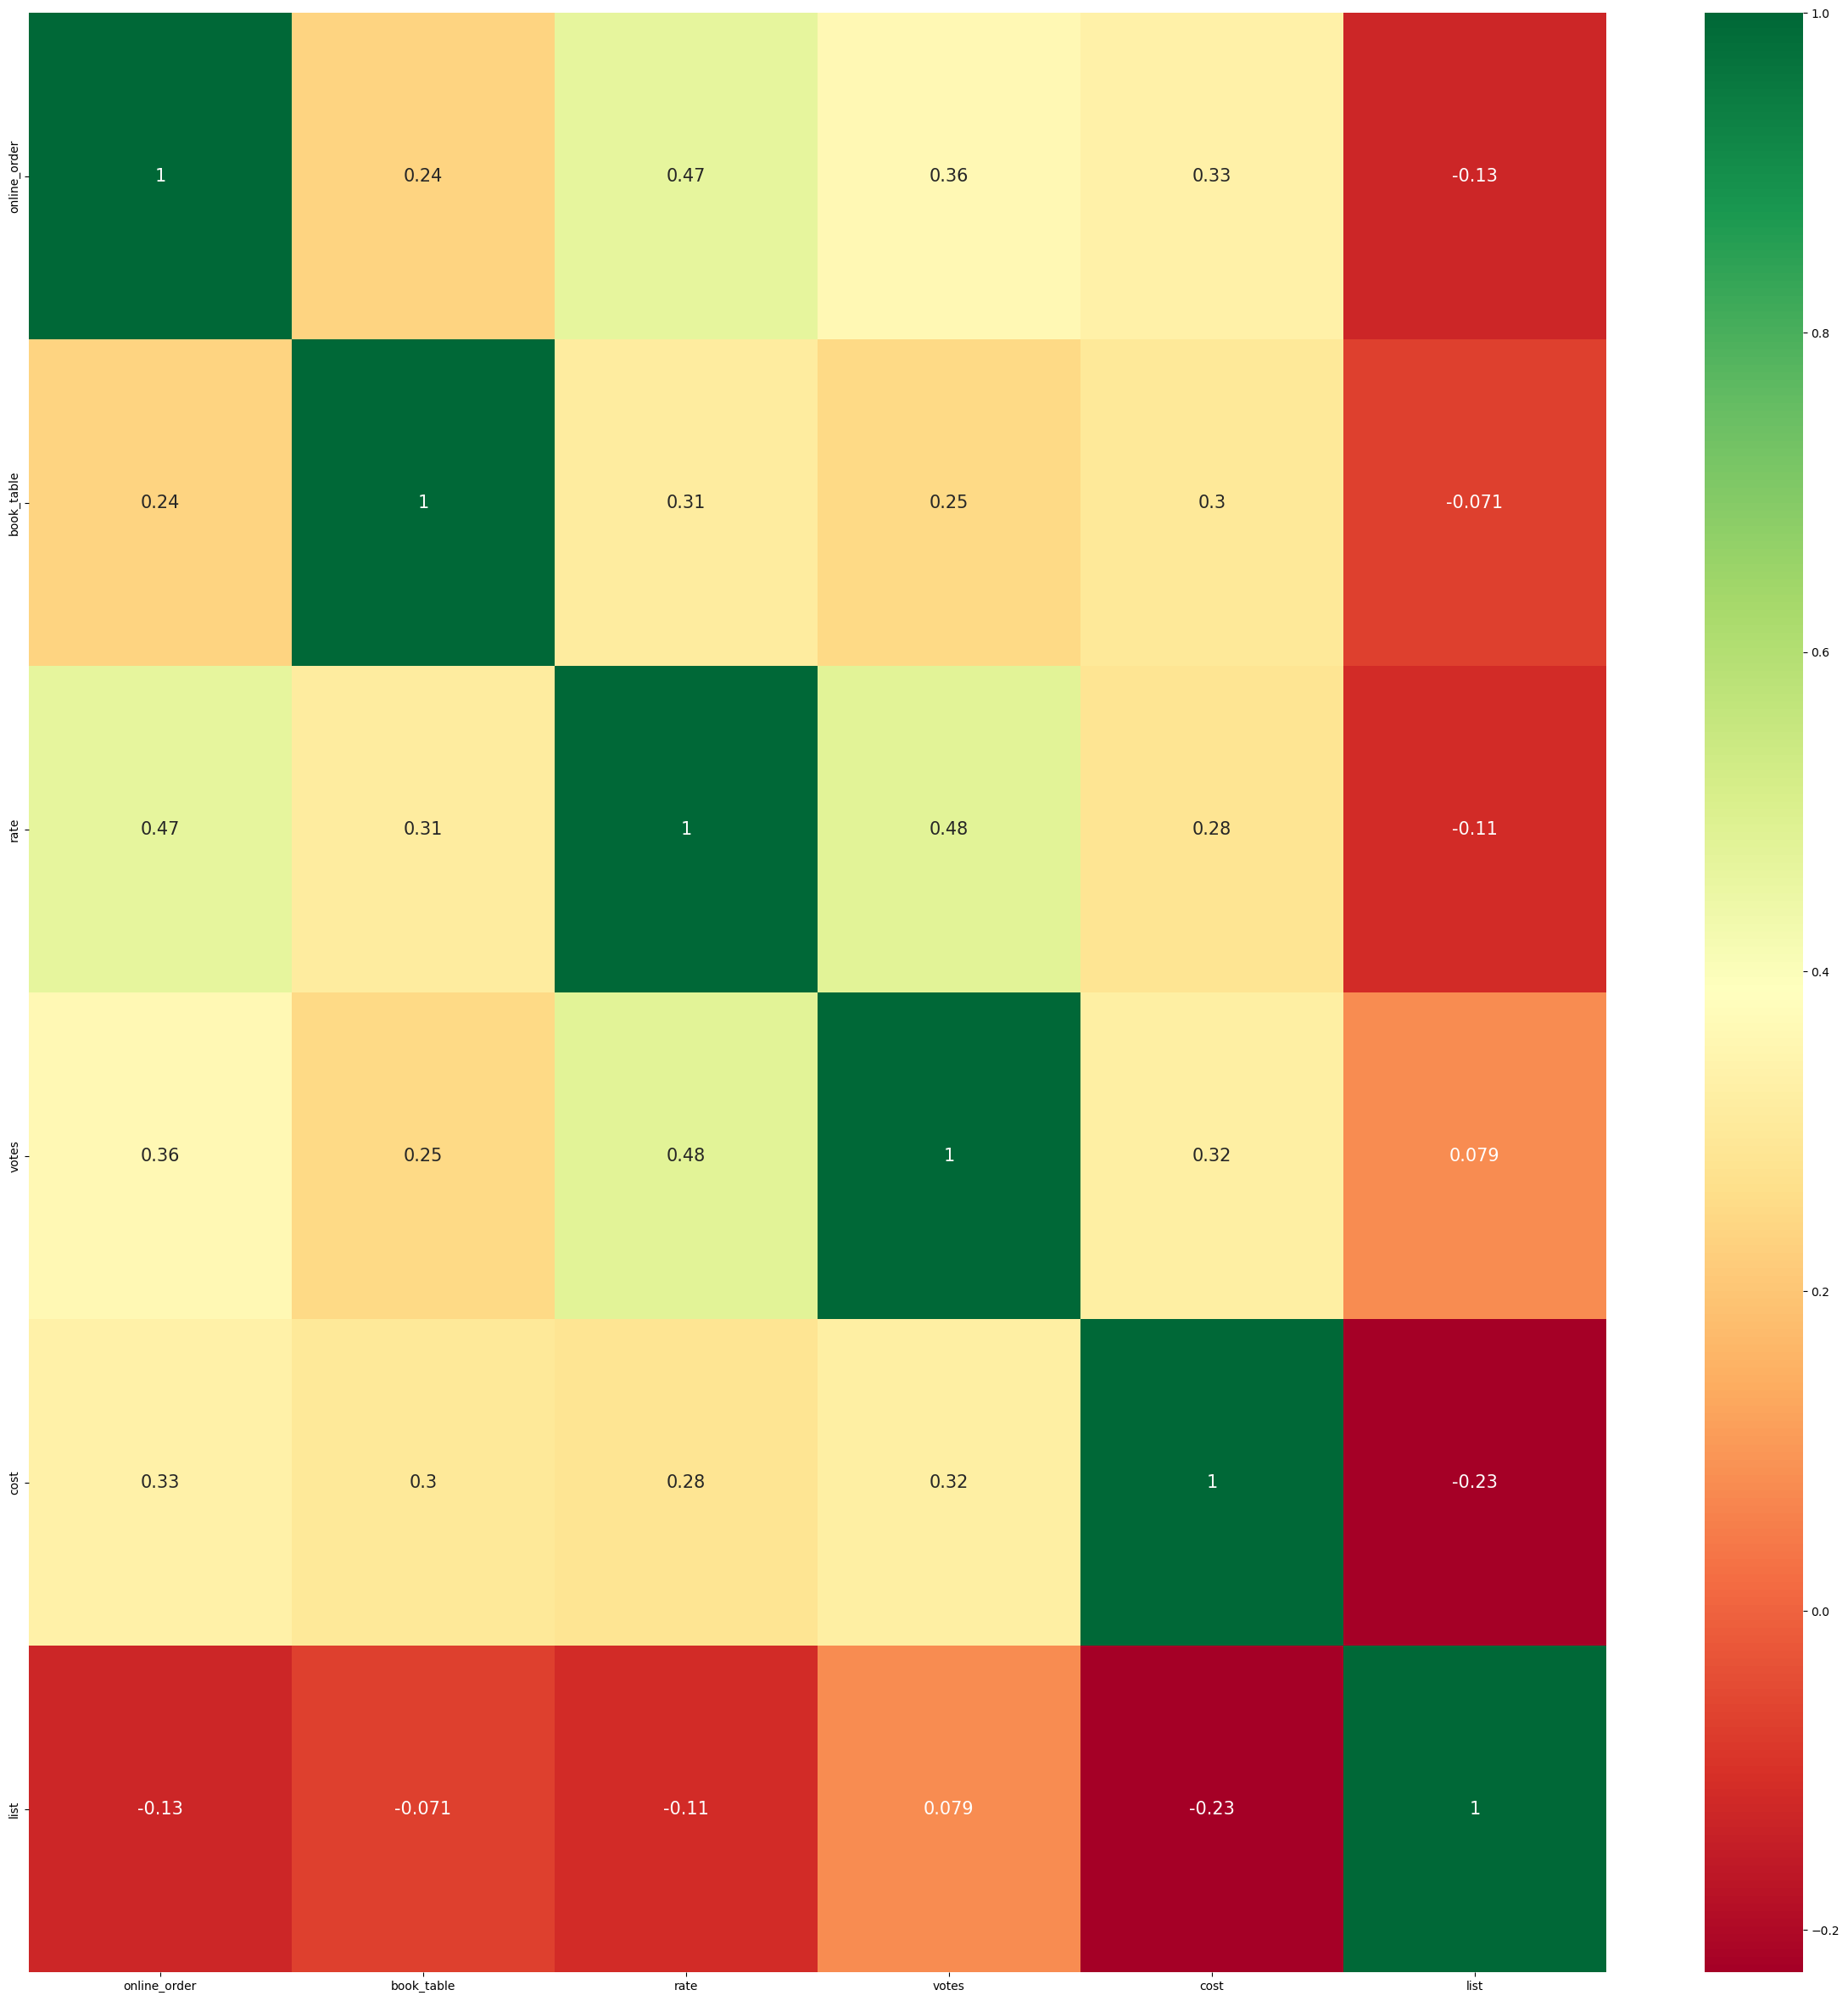

In [29]:
plt.figure(figsize=(30, 30))
sns.heatmap(num_data1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

# Removing unwanted columns 

In [30]:
df.drop(['name','rate'], axis="columns", inplace=True)

In [31]:
df

,online_order,book_table,votes,cost,list
0,1,1,775,800,0
1,1,0,787,800,0
2,1,0,918,800,0
3,0,0,88,300,0
4,0,0,166,600,0
...,...,...,...,...,...
143,0,0,0,100,2
144,0,0,0,150,2
145,1,0,771,450,2
146,0,0,98,800,2


# Model Building 

In [32]:
## Split data into x and y
x = df.drop('online_order', axis=1)
y = df.online_order

In [33]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [34]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [35]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({0: 74, 1: 44})
after smote Counter({0: 74, 1: 74})


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_smote, y_smote)

logistic_regression_pred = logistic_regression_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, logistic_regression_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, logistic_regression_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, logistic_regression_pred)
print("Precision:", precision)

recall = recall_score(y_test, logistic_regression_pred)
print("Recall:", recall)

f1 = f1_score(y_test, logistic_regression_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[13  3]
 [ 7  7]]
Accuracy: 0.6666666666666666
Precision: 0.7
Recall: 0.5
F1 Score: 0.5833333333333334


In [37]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [38]:
y_train_predict=model.predict(x_train)
y_train_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

In [39]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_train,y_train_predict)

0.9915254237288136

In [40]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.7333333333333333

In [41]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
}

In [42]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_smote,y_smote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [43]:
tree_cv.best_score_

0.8174149659863946

In [57]:
model=DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_leaf= 1,min_samples_split=2,splitter='best')
model.fit(x_smote,y_smote)#training the model
y_pred=model.predict(x_test)#prediction
y_pred#predicted values 

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1])

In [58]:
y_train_predict=model.predict(x_smote)#predicting training data to check training performance 
y_train_predict

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [59]:
# Testing accuracy
accuracy_score(y_test,y_pred)

0.7333333333333333

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_smote, y_smote)

random_forest_pred = random_forest_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, random_forest_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, random_forest_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, random_forest_pred)
print("Precision:", precision)

recall = recall_score(y_test, random_forest_pred)
print("Recall:", recall)

f1 = f1_score(y_test, random_forest_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[12  4]
 [ 4 10]]
Accuracy: 0.7333333333333333
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1 Score: 0.7142857142857143


In [48]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 




In [49]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True})


In [68]:
rf_clf2 = RandomForestClassifier(n_estimators= 1000, min_samples_split=10, min_samples_leaf= 1, max_features='sqrt', max_depth=20, bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)


In [69]:
# testing accuracy
accuracy_score(y_test,y_predict)

0.7

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(x_smote, y_smote)

gradient_boosting_pred = gradient_boosting_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, gradient_boosting_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, gradient_boosting_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, gradient_boosting_pred)
print("Precision:", precision)

recall = recall_score(y_test, gradient_boosting_pred)
print("Recall:", recall)

f1 = f1_score(y_test, gradient_boosting_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[12  4]
 [ 3 11]]
Accuracy: 0.7666666666666667
Precision: 0.7333333333333333
Recall: 0.7857142857142857
F1 Score: 0.7586206896551724


In [73]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)
accuracy_score(y_test,y_pred)

0.7666666666666667

In [54]:
error_rate=[]
for k in range(1,11):
  KNN=KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_smote,y_smote)
  y_pred=KNN.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.3,
 0.36666666666666664,
 0.3333333333333333,
 0.3,
 0.26666666666666666,
 0.23333333333333334,
 0.26666666666666666,
 0.23333333333333334,
 0.23333333333333334,
 0.26666666666666666]

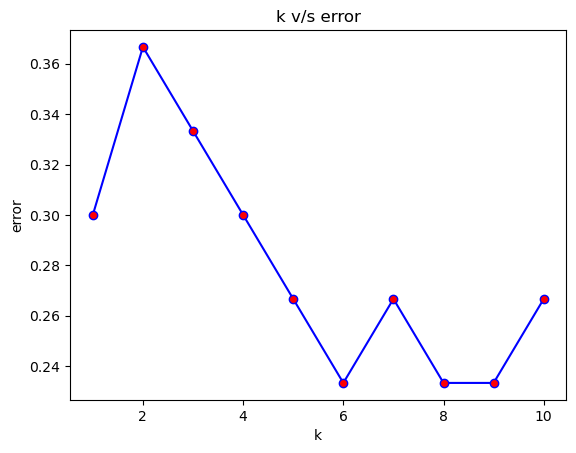

In [55]:
plt.plot(range(1,11),error_rate,color='blue',marker="o",markerfacecolor='red')
plt.xlabel("k")
plt.ylabel("error")
plt.title("k v/s error")
plt.show()

In [56]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(estimator=gradient_boosting_model,n_estimators=5)
model_bag.fit(x_smote,y_smote)
y_pred=model_bag.predict(x_test)
accuracy_score(y_test,y_pred)

0.7333333333333333